<a href="https://colab.research.google.com/github/KripaMishra/LangChain/blob/main/LangChain_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install --upgrade --quiet  langchain-core langchain-community langchain-openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.0/273.0 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.9/86.9 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.9/262.9 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 38.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.8/144.8 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.5 MB/s eta 0:00:00


In [6]:
import os

In [11]:
from google.colab import userdata

# Access the secret data using its name
my_secret_data = userdata.get("OPENAI_API_KEY")


In [15]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI

prompt = ChatPromptTemplate.from_template("tell me a short joke about {topic}")
model = ChatOpenAI(model="gpt-3.5-turbo-0125", openai_api_key=my_secret_data)
output_parser = StrOutputParser()

chain = prompt | model | output_parser

chain.invoke({"topic": "ice cream"})

"Why did the ice cream truck break down? It couldn't take the choco-lotta pressure!"

The prompt is a base template which takes in a dictionary of variables and then generates an output known as prompt value. This prompt value is complete and it can be fed to a LLM or a chat model.

Note: the difference between a chat model and LLM is that prior takes a sequence of messages as input while latter takes in a string.

In [16]:
prompt_value=prompt.invoke({'topic': 'ice cream'})
prompt_value

ChatPromptValue(messages=[HumanMessage(content='tell me a short joke about ice cream')])

In [17]:
prompt_value.to_messages()

[HumanMessage(content='tell me a short joke about ice cream')]

In [18]:
prompt_value.to_string()

'Human: tell me a short joke about ice cream'

In [19]:
message = model.invoke(prompt_value)
message

AIMessage(content='Why did the ice cream cone go to therapy? Because it had too many sprinkles of emotional issues!', response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 15, 'total_tokens': 36}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': 'fp_3bc1b5746c', 'finish_reason': 'stop', 'logprobs': None})

### Note here that here the output is a dictonary with a lots of keys and values, if the model was a LLM model instead of a chat model then the output would be a string only

In [20]:
message.content

'Why did the ice cream cone go to therapy? Because it had too many sprinkles of emotional issues!'

In [23]:
from langchain_openai import OpenAI

llm = OpenAI(model="gpt-3.5-turbo-instruct", openai_api_key=my_secret_data)
llm.invoke(prompt_value)

'\n\nWhy did the ice cream go to the doctor? Because it was feeling a little rocky road.'

Here the output is a string of values instead of dictonary

To maintain the consitency we will use the output parser which will convert the output whether string or dictonary into a simplified string output

In [24]:
output_parser.invoke(message)

'Why did the ice cream cone go to therapy? Because it had too many sprinkles of emotional issues!'

# Entire Pipeline


*   Pass the user input on the desired topic as `{'topic':"your input"}`

*   The prompt component then takes in the value of topic and creates a PromptValue.

*   The model component takes the generated prompt, and passes into the OpenAI LLM model for evaluation. The generated output from the model is a ChatMessage object.
*  
Finally, the output_parser component takes in a ChatMessage, and transforms this into a Python string, which is returned from the invoke method




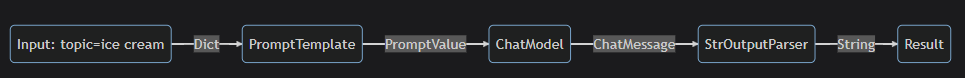

In [25]:
input={'topic': 'Banana'}

In [26]:
prompt.invoke(input)

ChatPromptValue(messages=[HumanMessage(content='tell me a short joke about Banana')])

Using the | we have chained multiple components together

In [28]:
(prompt|model|output_parser).invoke(input)

"Why did the banana go to the doctor?\nBecause it wasn't peeling well!"

# RAG Search Example

In [29]:
!pip install langchain docarray tiktoken

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 810.5/810.5 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.2/270.2 kB 25.3 MB/s eta 0:00:00


In [30]:
from langchain_community.vectorstores import DocArrayInMemorySearch
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables import RunnableParallel, RunnablePassthrough
from langchain_openai import ChatOpenAI, OpenAIEmbeddings


In [ ]:
model="gpt-3.5-turbo-instruct", openai_api_key=my_secret_data

In [34]:
my_secret_data = userdata.get("OPENAI_API_KEY")

In [44]:
from tempfile import template
vectorstore=DocArrayInMemorySearch.from_texts(
    ['Roman Reigns won the last Wrestlemania against Cody Rhodes', 'Cody won his second Royal Rumble in a row and he will fight Roman again this Wrestlemania', 'Rock versus Cody will also be a good match-up'],
     embedding=OpenAIEmbeddings(openai_api_key=my_secret_data),

)
retriever = vectorstore.as_retriever()
template = """Answer the question based only on the following context:
{context}

Question: {question}
"""

prompt=ChatPromptTemplate.from_template(template)
model=ChatOpenAI(model="gpt-3.5-turbo", openai_api_key=my_secret_data)
setup_and_retrieval =RunnableParallel(
    {'context': retriever, "question": RunnablePassthrough()}
)
chain=setup_and_retrieval|prompt|model|output_parser
chain.invoke("Who will fight Roman Reigns at ?")

'Cody Rhodes'

# Complete Flowchart
1. The first steps create a RunnableParallel object with two entries. The first entry, context will include the document results fetched by the retriever. The second entry, question will contain the user’s original question. To pass on the question, we use RunnablePassthrough to copy this entry.

2. Feed the dictionary from the step above to the prompt component. It then takes the user input which is question as well as the retrieved document which is context to construct a prompt and output a PromptValue.
3. The model component takes the generated prompt, and passes into the OpenAI LLM model for evaluation. The generated output from the model is a ChatMessage object.
4. Finally, the output_parser component takes in a ChatMessage, and transforms this into a Python string, which is returned from the invoke method.


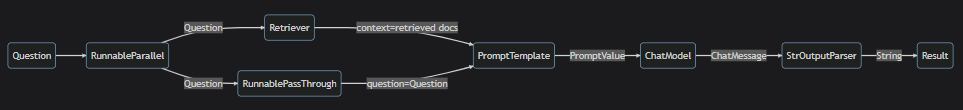